IMPORT LIBRARIES

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

LOAD THE DATASET

In [110]:
data=pd.read_csv("Twitter Sentiments.csv")

In [111]:
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [112]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [113]:
#data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [114]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

PREPROCESSING

In [116]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for word in r:
        input_txt=re.sub(word, "",input_txt)
    return  input_txt

In [117]:
#remove twitter handles(@user)
data["Clean_tweet"]=np.vectorize(remove_pattern)(data["tweet"],"@[\w]*")


In [118]:
data.head()

,id,label,tweet,Clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [119]:
#remove special characters , numbers and punctuations
data["Clean_tweet"]=data["Clean_tweet"].str.replace("[^a-zA-Z#]"," ")

In [120]:
data.head()

,id,label,tweet,Clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [121]:
#remove short words
data["Clean_tweet"]=data["Clean_tweet"].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))
data.head()

,id,label,tweet,Clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [122]:
#individual words considered as tockens
tokenized_tweet=data["Clean_tweet"].apply(lambda x:x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: Clean_tweet, dtype: object

In [123]:
#stem the words
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_tweet=tokenized_tweet.apply(lambda sentence:[stemmer.stem(word)for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: Clean_tweet, dtype: object

In [124]:
#combine into single string or sentence or words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])

data["Clean_tweet"]=tokenized_tweet
data.head()

,id,label,tweet,Clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


EXPLORATORY DATA ANALYSIS

In [126]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


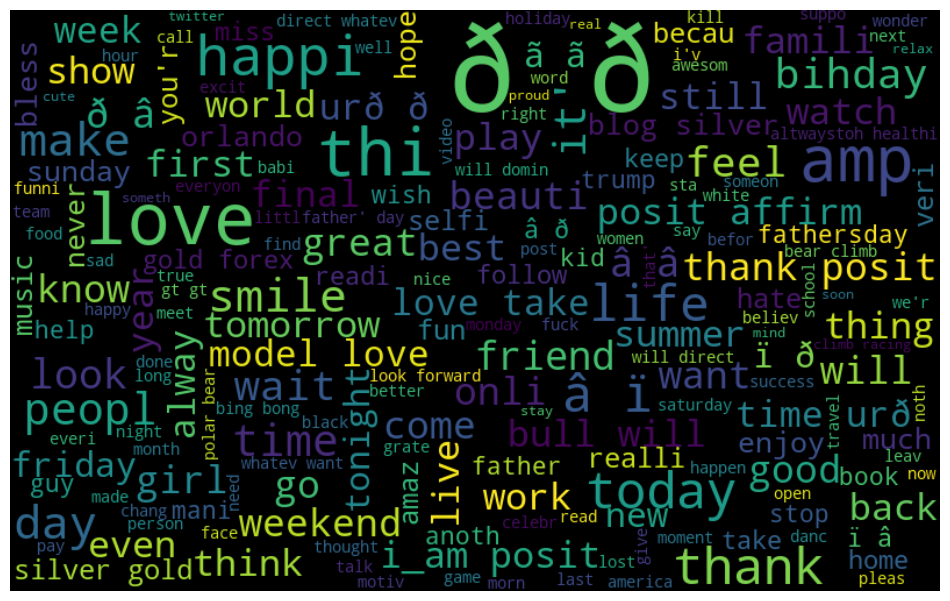

In [127]:
#Display or visualize frequent words
all_words=" ".join([sentence for sentence in data["Clean_tweet"]])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=[12,8])
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

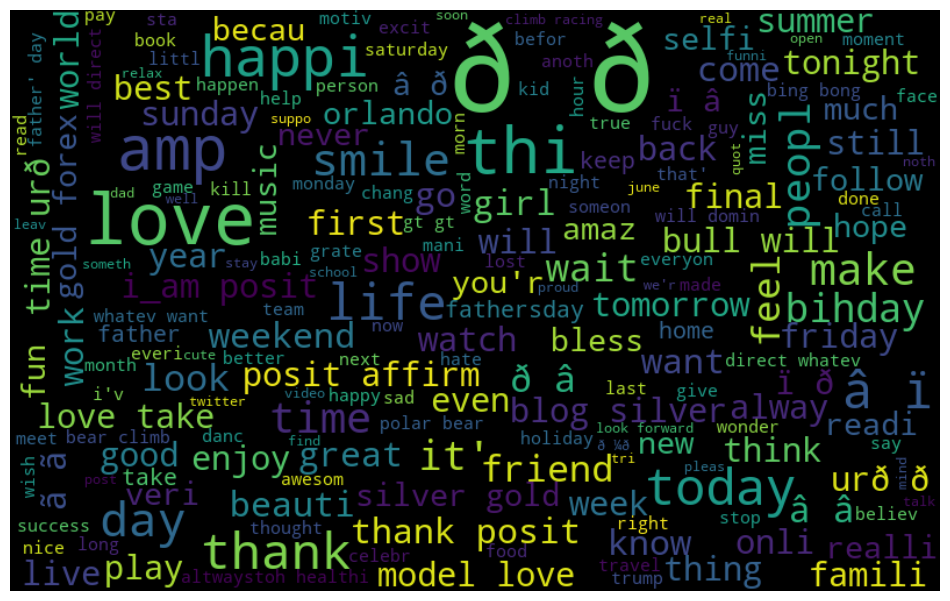

In [128]:
#frequent words visualization for +ve 
all_words=" ".join([sentence for sentence in data["Clean_tweet"][data["label"]==0]])


wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=[12,8])
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

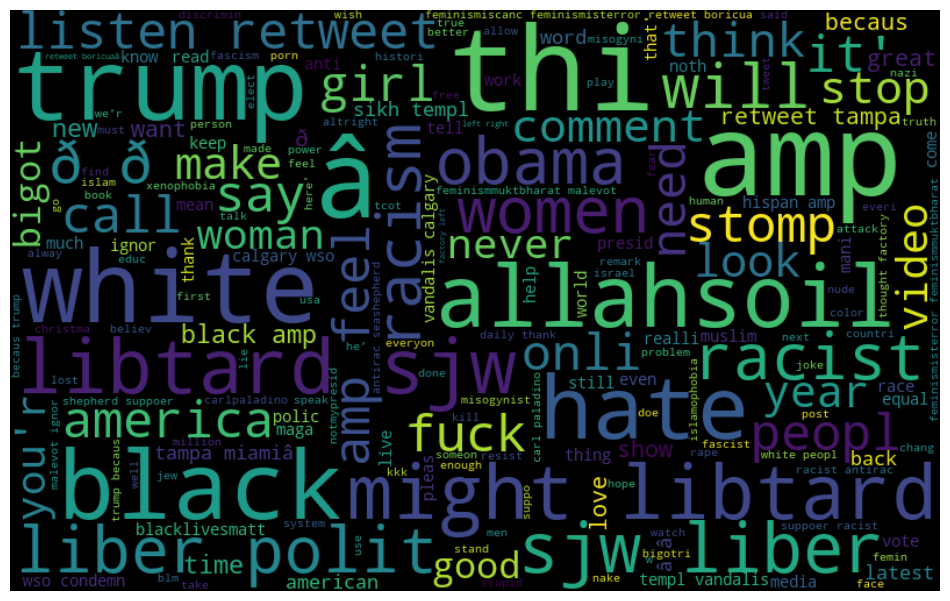

In [129]:
all_words=" ".join([sentence for sentence in data["Clean_tweet"][data["label"]==1]])


wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=[12,8])
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [130]:
#extract the hashtag
def hashtag_extract(tweet):
    hashtags=[]
    #loop words in tweet 
    for tweet in tweet:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags

In [131]:
#extract hashtags from non racist /sexist tweets
ht_positive=hashtag_extract(data["Clean_tweet"][data["label"]==0])

#extract hashtags from non racist /sexist tweets
ht_negative=hashtag_extract(data["Clean_tweet"][data["label"]==1])

In [132]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [133]:
#unnest list
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

In [134]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [135]:
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [136]:
freq=nltk.FreqDist(ht_positive)
d=pd.DataFrame({"Hashtag":list(freq.keys()),
                "Count":list(freq.values())})

In [137]:
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


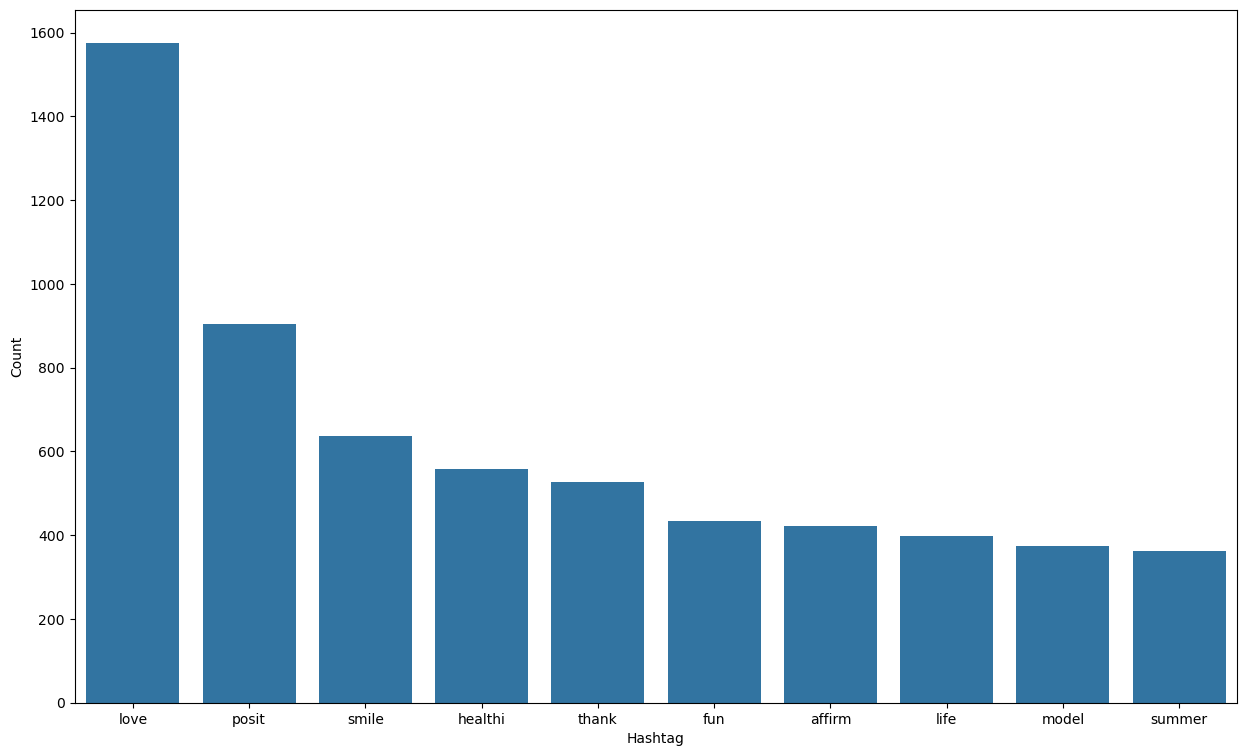

In [138]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [139]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


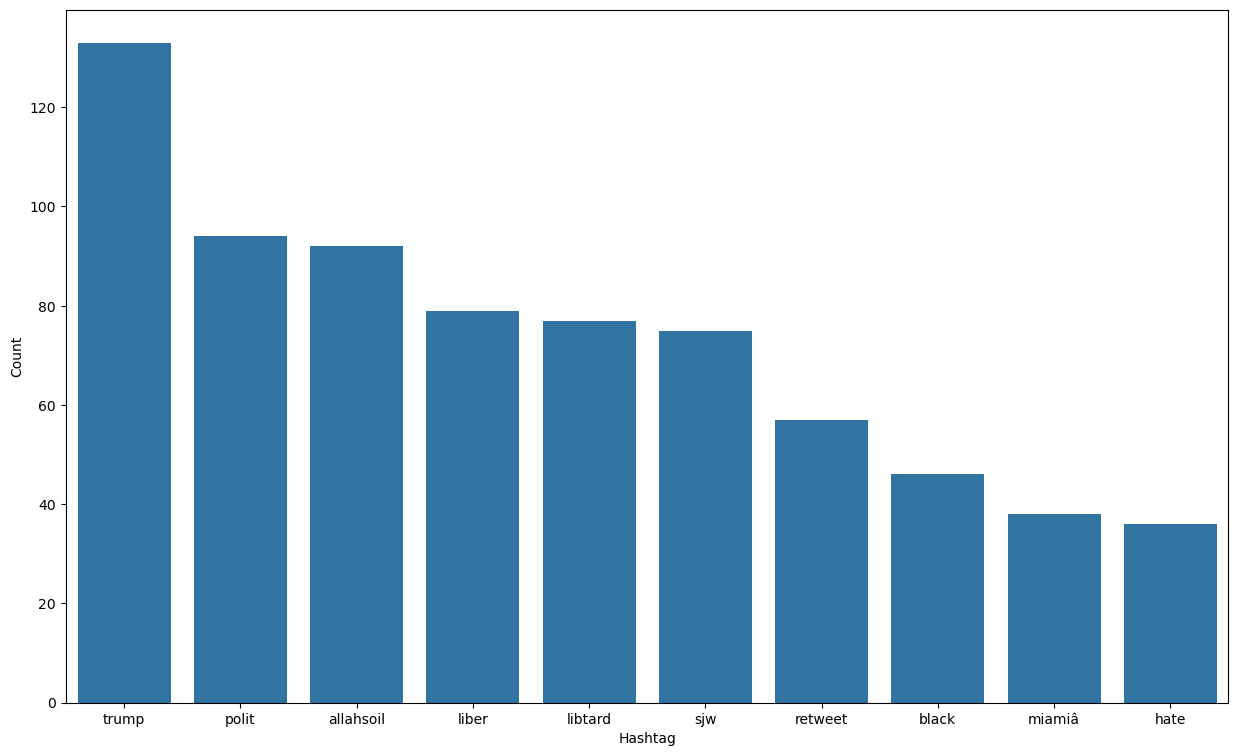

In [140]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

INPUT SPLIT

In [142]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['Clean_tweet'])

In [143]:
# bow[0].toarray()

In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, data['label'], random_state=42, test_size=0.25)

MODEL TRAINING

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [147]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [148]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.506508875739645

In [149]:
accuracy_score(y_test,pred)

0.9478162933299963

In [150]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
pred_prob[0][1] >= 0.3